In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile
import numpy as np
from scipy.stats import iqr

Instantiating the "read_csv()" function for each '.csv' files.

In [2]:
# French outlets
tva = pd.read_csv('TVAnouvelles_facebook_statuses.csv')
radiocanada = pd.read_csv('radiocanada.info_facebook_statuses.csv')
# English outlets
ctv = pd.read_csv('CTVNews_facebook_statuses.csv')
cbc = pd.read_csv('cbcnews_facebook_statuses.csv')

Our data frame's columns.

In [3]:
tva.columns

Index(['status_id', 'status_message', 'link_name', 'status_type',
       'status_link', 'status_published', 'num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys', 'num_special'],
      dtype='object')

Our data frame first row.

In [4]:
tva[:1]

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_special
0,163706859094_10156641770669095,Une hausse de 4500% en 4 ans 😲,Le nombre de drones qui survolent nos prisons ...,link,http://www.tvanouvelles.ca/2018/05/13/le-nombr...,2018-05-13 22:02:08,116,21,45,55,4,18,36,0,3,0


# Data cleaning

Grabbing all posts after "2016-02-24". (Facebook started using "reactions" at that date)

(https://newsroom.fb.com/news/2016/02/reactions-now-available-globally/)

(Not clearing outliers for the sake of data integrity)

In [5]:
tva_clean = tva.where(tva.status_published >= '2016-02-24').dropna().reset_index(drop=True)
radiocanada_clean = radiocanada.where(radiocanada.status_published >= '2016-02-24').dropna().reset_index(drop=True)

ctv_clean = ctv.where(ctv.status_published >= '2016-02-24').dropna().reset_index(drop=True)
cbc_clean = cbc.where(cbc.status_published >= '2016-02-24').dropna().reset_index(drop=True)

Appending TVA with Radio-Canada and CTV News with CBC News, we end up with a French and English data frame.

In [6]:
french = tva_clean.append(radiocanada_clean).reset_index(drop=True)
english = ctv_clean.append(cbc_clean).reset_index(drop=True)

Since we don't need 'num_special' we'll clear them out from our data frames.

In [7]:
french = french.where(french.num_special == 0).dropna().reset_index(drop=True)
english = english.where(english.num_special == 0).dropna().reset_index(drop=True)

We don't need 'num_likes', let's subtract it from 'num_reactions' since we want the exact sum of all sentiments. 

('num_reactions' is the sum of all reactions 'Likes', 'Loves', 'Hahas', 'Angrys', etc.)

In [8]:
french['num_reactions'] = french['num_reactions'] - french['num_likes']
english['num_reactions'] = english['num_reactions'] - english['num_likes']

Let's grab our columns of interest

In [9]:
french = french[['num_reactions','num_comments','num_shares','num_loves','num_wows','num_hahas','num_sads','num_angrys']]
english =  english[['num_reactions','num_comments','num_shares','num_loves','num_wows','num_hahas','num_sads','num_angrys']]

We end up with a clean data frame

In [10]:
french.head()

,num_reactions,num_comments,num_shares,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,61.0,21.0,45.0,4.0,18.0,36.0,0.0,3.0
1,168.0,70.0,27.0,150.0,3.0,5.0,1.0,9.0
2,194.0,37.0,125.0,21.0,126.0,0.0,47.0,0.0
3,100.0,52.0,13.0,87.0,0.0,10.0,0.0,3.0
4,54.0,81.0,10.0,45.0,2.0,7.0,0.0,0.0


In [11]:
french.tail()

,num_reactions,num_comments,num_shares,num_loves,num_wows,num_hahas,num_sads,num_angrys
3523,62.0,81.0,97.0,1.0,9.0,29.0,8.0,15.0
3524,21.0,49.0,55.0,8.0,9.0,3.0,0.0,1.0
3525,131.0,38.0,29.0,65.0,21.0,9.0,8.0,28.0
3526,55.0,78.0,41.0,4.0,5.0,7.0,11.0,28.0
3527,26.0,20.0,50.0,1.0,0.0,1.0,6.0,18.0


# Sentiment correlation analysis

'num_reactions', 'num_comments' and 'num_shares' are the 3 main ways users interact with posts on Facebook

Note: (> 0.50) is considered highly correlated (i.e > 50%)

('num_reactions' is the sum of all 'reactions', i.e Love, Haha, Sad, etc.)

Grabbing same amount of posts for 'french' and 'english' posts 

In [12]:
french = french[:3528]
english = english[:3528]

French and English correlation plot

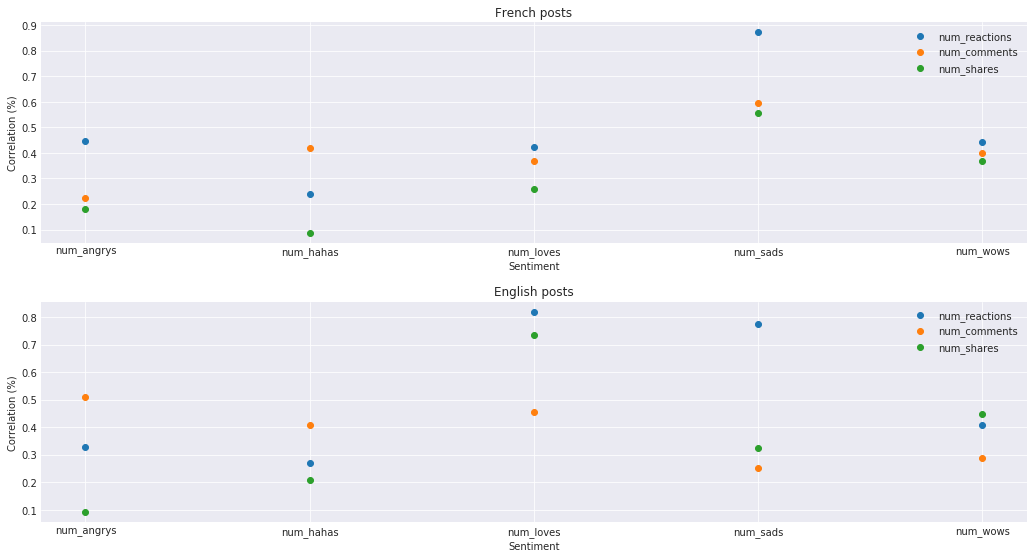

In [13]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=[15,8])

    plt.subplot(211)
    plt.title('French posts')
    plt.xlabel('Sentiment')
    plt.ylabel('Correlation (%)')
    plt.plot(french.corr()[['num_reactions','num_comments','num_shares']][3::],'o')
    plt.legend(['num_reactions','num_comments','num_shares'])
    
    plt.tight_layout(pad=3)
    
    plt.subplot(212)
    plt.title('English posts')
    plt.xlabel('Sentiment')
    plt.ylabel('Correlation (%)')
    plt.plot(english.corr()[['num_reactions','num_comments','num_shares']][3::],'o')
    plt.legend(['num_reactions','num_comments','num_shares'])

French sentiment correlation

In [14]:
french.corr()[['num_reactions','num_comments','num_shares']][3::].round(decimals=2)

,num_reactions,num_comments,num_shares
num_loves,0.42,0.37,0.26
num_wows,0.44,0.40,0.37
num_hahas,0.24,0.42,0.09
num_sads,0.87,0.59,0.55
num_angrys,0.45,0.22,0.18


'num_sads' is highly correlated with 'num_reactions', which indicates that 'sad' tend to be high on posts with high 'reactions'.

(We can also say that the majority of the 'reaction' surge on a post is due to 'sad')

In [15]:
french.corr()[['num_reactions','num_comments','num_shares']][['num_reactions']][6::6].round(decimals=2)

,num_reactions
num_sads,0.87


'num_sads' is also highly correlated with 'num_comments', comments tend to be high on posts with many 'sads'.

In [16]:
french.corr()[['num_reactions','num_comments','num_shares']][['num_comments']][6::6].round(decimals=2)

,num_comments
num_sads,0.59


'num_sads' has a high correlation with 'num_shares', posts with many 'sads' on them tend to be shared alot.

In [17]:
french.corr()[['num_reactions','num_comments','num_shares']][['num_shares']][6::6].round(decimals=2)

,num_shares
num_sads,0.55


English sentiment correlation

In [18]:
english.corr()[['num_reactions','num_comments','num_shares']][3::].round(decimals=2)

,num_reactions,num_comments,num_shares
num_loves,0.82,0.46,0.73
num_wows,0.41,0.29,0.45
num_hahas,0.27,0.41,0.21
num_sads,0.78,0.25,0.33
num_angrys,0.33,0.51,0.09


'num_reactions' is highly correlated with 'num_loves' and 'num_sads', both 'sad' and 'love' tend to be high on posts with high 'reactions'

In [19]:
english.corr()[['num_reactions','num_comments','num_shares']][['num_reactions']][3::3].round(decimals=2)

,num_reactions
num_loves,0.82
num_sads,0.78


'num_comments' has a high correlation with num_angrys, posts with alot of 'angry' tend to have more comments.

In [20]:
english.corr()[['num_reactions','num_comments','num_shares']][['num_comments']][7::7].round(decimals=2)

,num_comments
num_angrys,0.51


'num_shares' is highly correlated with 'num_loves', posts with alot of 'love' are more likely to be shared

In [21]:
english.corr()[['num_reactions','num_comments','num_shares']][['num_shares']][3::5].round(decimals=2)

,num_shares
num_loves,0.73
